# Programme permettant de mettre en évidence les résultats du plan d'experience mené


### Importation des Bibliothèques

In [1]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import random
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

import time
import zmq
import array
from utils import myfct,mydisplay
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Mise en évidence de l'effet de l'algorithme d'oublie des outliers

In [3]:
total_batch = 36# Car on a sauvegardé un batch de 36 experience différentes donc on a 36 base de données
saving_file = "forgetting_algorithm"

batch_y_train_acc_exp = []
batch_y_train_acc_true = []
batch_X_train_acc_rough = []

noForget_batch_y_train_acc_exp = []
noForget_batch_y_train_acc_true = []
noForget_batch_X_train_acc_rough = []

for i in range(total_batch):
    path_noForget_y_train_acc_exp = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"noForget_y_train_acc_exp"
    noForget_batch_y_train_acc_exp.append(myfct.readPickler(path_noForget_y_train_acc_exp))
    path_noForget_y_train_acc_true = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"noForget_y_train_acc_true"
    noForget_batch_y_train_acc_true.append(myfct.readPickler(path_noForget_y_train_acc_true))
    path_noForget_X_train_acc_rough = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"noForget_X_train_acc_rough"
    noForget_batch_X_train_acc_rough.append(myfct.readPickler(path_noForget_X_train_acc_rough))
    
    path_y_train_acc_exp = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"y_train_acc_exp"
    batch_y_train_acc_exp.append(myfct.readPickler(path_y_train_acc_exp))
    path_y_train_acc_true = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"y_train_acc_true"
    batch_y_train_acc_true.append(myfct.readPickler(path_y_train_acc_true))
    path_X_train_acc_rough = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"X_train_acc_rough"
    batch_X_train_acc_rough.append(myfct.readPickler(path_X_train_acc_rough))

In [5]:
mean_obj_ER_no_forget, mean_noobj_ER_no_forget,mean_total_ER_no_forget = 0,0,0
mean_obj_ER, mean_noobj_ER,mean_total_ER = 0,0,0

for i in range(len(batch_y_train_acc_exp)):
    print("Experience Numero :",i)
    phi = myfct.error_pred(noForget_batch_y_train_acc_exp[i][:],noForget_batch_y_train_acc_true[i][:])
    print("nb de données avant oublie :",len(noForget_batch_y_train_acc_exp[i]))
    print("Taux d'erreur avant oublie :",phi)
    lippe = myfct.error_pred(batch_y_train_acc_exp[i][:],batch_y_train_acc_true[i][:])
    print("nb de données apres oublie :",len(batch_y_train_acc_exp[i]))
    print("Taux d'erreur apres oublie :",lippe)
    
    mean_obj_ER_no_forget += phi[0]
    mean_noobj_ER_no_forget += phi[1]
    mean_total_ER_no_forget += phi[2]
    
    mean_obj_ER += lippe[0]
    mean_noobj_ER += lippe[1]
    mean_total_ER += lippe[2]
    
length = len(batch_y_train_acc_exp)

mean_obj_ER_no_forget /= length
mean_noobj_ER_no_forget /= length
mean_total_ER_no_forget /= length

mean_obj_ER /= length
mean_noobj_ER /= length
mean_total_ER /= length
print("\n")    
print("mean Obj Error Rate befor forgetting :",int(mean_obj_ER_no_forget*1000)/1000)
print("mean background Error Rate befor forgetting :",int(mean_noobj_ER_no_forget*1000)/1000)
print("mean total Error Rate befor forgetting :",int(mean_total_ER_no_forget*1000)/1000)
print("mean Obj Error Rate after forgetting :",int(mean_obj_ER*1000)/1000)
print("mean background Error Rate after forgetting :",int(mean_noobj_ER*1000)/1000)
print("mean total Error Rate after forgetting :",int(mean_total_ER*1000)/1000)

Experience Numero : 0
nb de données avant oublie : 138
Taux d'erreur avant oublie : [0.18181818 0.31428571 0.2826087 ]
nb de données apres oublie : 84
Taux d'erreur apres oublie : [0.03703704 0.14035088 0.10714286]
Experience Numero : 1
nb de données avant oublie : 135
Taux d'erreur avant oublie : [0.09090909 0.21978022 0.17777778]
nb de données apres oublie : 109
Taux d'erreur apres oublie : [0.02702703 0.16666667 0.11926606]
Experience Numero : 2
nb de données avant oublie : 142
Taux d'erreur avant oublie : [0.16666667 0.3        0.26056338]
nb de données apres oublie : 100
Taux d'erreur apres oublie : [0.03333333 0.12857143 0.1       ]
Experience Numero : 3
nb de données avant oublie : 121
Taux d'erreur avant oublie : [0.08       0.08450704 0.08264463]
nb de données apres oublie : 103
Taux d'erreur apres oublie : [0.         0.01724138 0.00970874]
Experience Numero : 4
nb de données avant oublie : 133
Taux d'erreur avant oublie : [0.08333333 0.25773196 0.21052632]
nb de données apre

<Figure size 1080x576 with 0 Axes>

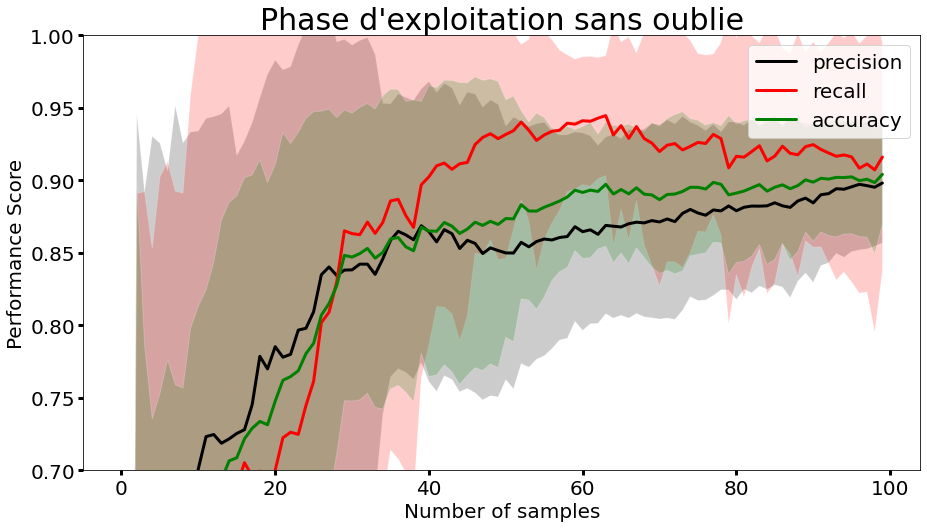

<Figure size 1080x576 with 0 Axes>

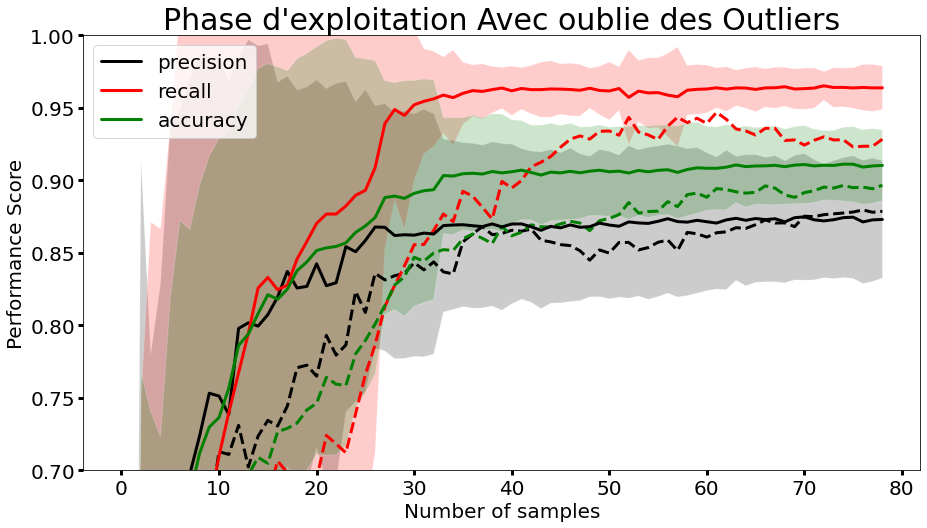

In [7]:
FPFHL_folder = "env2_table3"# On va tester notre modèle sur cette environnement précis car c'est sur ce dernier
                            #que nous l'avons entrainer
nb_scenes = 19

###DISPLAY Precision, Recall & Accuracy of the robotic arm
#title = "Interpretation des résultats de la simulation"
#mydisplay.displayNormalizedResults(title,batch_y_train_acc_exp,batch_y_train_acc_true,batch_X_train_acc_rough)

###DISPLAY Precision, Recall & Accuracy from a database without forgetting
title = "Phase d'exploitation avec les outliers, véritables Labels"

#from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier(n_neighbors=10)
#model = SVC(kernel = 'rbf',probability=True,class_weight = 'balanced')
#mydisplay.displayNormalizedResults2(model,FPFHL_folder,nb_scenes,title,noForget_batch_y_train_acc_true,noForget_batch_y_train_acc_true,noForget_batch_X_train_acc_rough)


###DISPLAY Precision, Recall & Accuracy from a database
#title = "Phase d'exploitation à partir des données rééquilibrées de 20 scènes avec oublie"
#title = "Phase d'exploitation Sans les outliers"

#from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier(n_neighbors=10)
#model = SVC(kernel = 'rbf',probability=True,class_weight = 'balanced')
#mydisplay.displayNormalizedResults2(model,FPFHL_folder,nb_scenes,title,batch_y_train_acc_exp,batch_y_train_acc_true,batch_X_train_acc_rough)


###DISPLAY Precision, Recall & Accuracy from truth
#title = "Phase d'exploitation à partir des données rééquilibrées de 20 scènes avec oublie et veritable label"

#from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier(n_neighbors=10)
#model = SVC(kernel = 'rbf',probability=True,class_weight = 'balanced')
#mydisplay.displayNormalizedResults2(model,FPFHL_folder,nb_scenes,title,batch_y_train_acc_true,batch_y_train_acc_true,batch_X_train_acc_rough)


title = "Phase d'exploitation sans oublie"


#model = SVC(kernel = 'rbf',probability=True,class_weight = 'balanced')
model = RandomForestClassifier()

mydisplay.displayNormalizedResults2(model,FPFHL_folder,nb_scenes,title,
                                    noForget_batch_y_train_acc_exp,noForget_batch_y_train_acc_true,noForget_batch_X_train_acc_rough)


title = "Phase d'exploitation Avec oublie des Outliers"


#model = SVC(kernel = 'rbf',probability=True,class_weight = 'balanced')
model = RandomForestClassifier()

mydisplay.displayNormalizedResults3(model,nb_scenes,title,
                          FPFHL_folder,noForget_batch_y_train_acc_exp,noForget_batch_y_train_acc_true,noForget_batch_X_train_acc_rough,
                          FPFHL_folder,batch_y_train_acc_exp,batch_y_train_acc_true,batch_X_train_acc_rough)

###DISPLAY Error Rate
#title = "Error Rates au cours de l'apprentissage testé sur une base de données rééquilibrées de 20 scènes\n"
#y_lim = (0,0.3)
#num_batch = 0
#mydisplay.error_rates_on_Dataset(num_batch,model,y_lim,FPFHL_folder,nb_scenes,title,batch_y_train_acc_exp,batch_y_train_acc_true,batch_X_train_acc_rough)

# Mise en évidence de l'effet de l'ajout de l'Histogramme CieLAB dans le vecteur descriptif de nos SVP

In [8]:
total_batch = 20
saving_file = "CieLAB_Experiment"
#saving_file = "Random_Forest"

batch_y_train_acc_exp = []
batch_y_train_acc_true = []
batch_X_train_acc_rough = []

without_batch_y_train_acc_exp = []
without_batch_y_train_acc_true = []
without_batch_X_train_acc_rough = []

for i in range(total_batch):
    path_without_y_train_acc_exp = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"without_y_train_acc_exp"
    without_batch_y_train_acc_exp.append(myfct.readPickler(path_without_y_train_acc_exp))
    path_without_y_train_acc_true = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"without_y_train_acc_true"
    without_batch_y_train_acc_true.append(myfct.readPickler(path_without_y_train_acc_true))
    path_without_X_train_acc_rough = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"without_X_train_acc_rough"
    without_batch_X_train_acc_rough.append(myfct.readPickler(path_without_X_train_acc_rough))
    
    path_y_train_acc_exp = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"y_train_acc_exp"
    batch_y_train_acc_exp.append(myfct.readPickler(path_y_train_acc_exp))
    path_y_train_acc_true = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"y_train_acc_true"
    batch_y_train_acc_true.append(myfct.readPickler(path_y_train_acc_true))
    path_X_train_acc_rough = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"X_train_acc_rough"
    batch_X_train_acc_rough.append(myfct.readPickler(path_X_train_acc_rough))

<Figure size 1080x576 with 0 Axes>

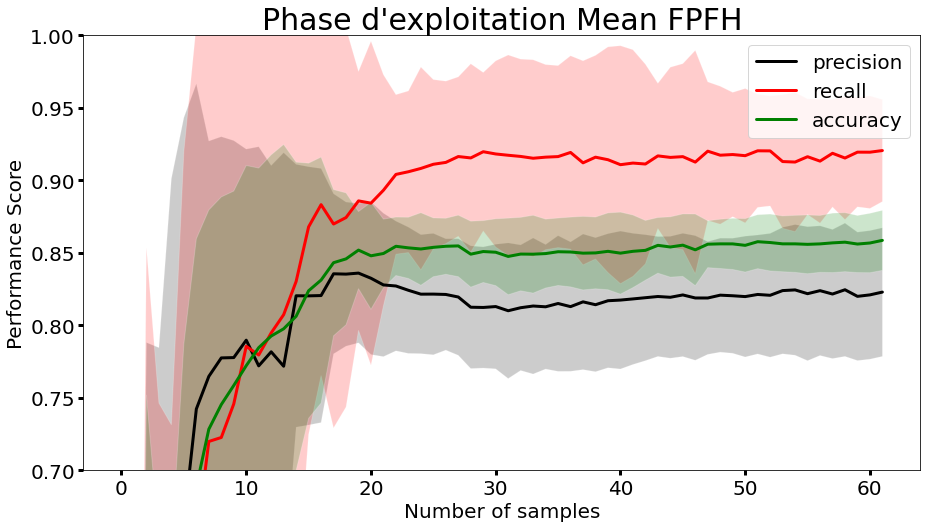

<Figure size 1080x576 with 0 Axes>

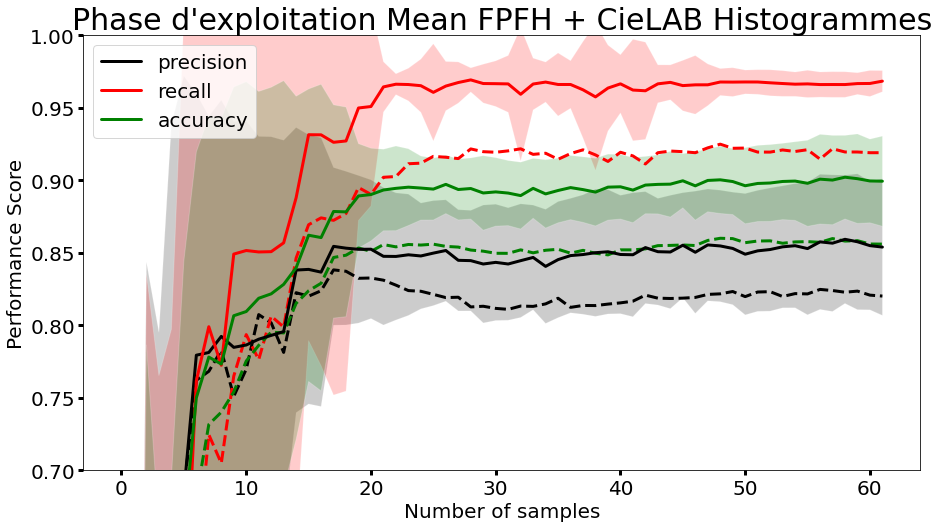

In [9]:
FPFHL_folder = "env2_table3"
FPFHL_folder_without = "env2_table3_withoutCieLAB"
nb_scenes = 19


###DISPLAY Precision, Recall & Accuracy 
title = "Phase d'exploitation Mean FPFH"

#from sklearn.neighbors import KNeighborsClassifier
#model = KNeighborsClassifier(n_neighbors=10)
#model = SVC(kernel = 'rbf',probability=True,class_weight = 'balanced')
model = RandomForestClassifier()
mydisplay.displayNormalizedResults2(model,FPFHL_folder_without,nb_scenes,title,without_batch_y_train_acc_exp,without_batch_y_train_acc_true,without_batch_X_train_acc_rough)



title = "Phase d'exploitation Mean FPFH + CieLAB Histogrammes"


#model = SVC(kernel = 'rbf',probability=True,class_weight = 'balanced')
model = RandomForestClassifier()

mydisplay.displayNormalizedResults3(model,nb_scenes,title,
                          FPFHL_folder_without,batch_y_train_acc_exp,batch_y_train_acc_true,without_batch_X_train_acc_rough,
                          FPFHL_folder,batch_y_train_acc_exp,batch_y_train_acc_true,batch_X_train_acc_rough)





### Réponse à la question suivante:
Que ce passe t'il si on ajoute un seuil à partir duquel les prédictions d'un SVP d'appartenir à un objet sont acceptés. par exemple si on pause le seuil à 0.7 et que la prediction d'appartenir à un objet de notre classifieur pour un svp est de 0.65 alors ce dernier sera considéré comme appartenant au background

<Figure size 1080x576 with 0 Axes>

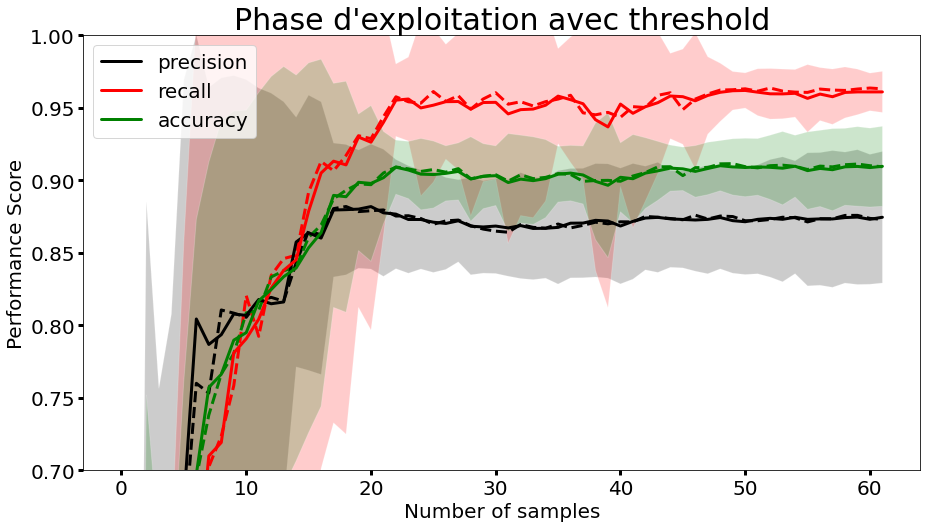

In [12]:
threshold = 0.6

title = "Phase d'exploitation avec threshold"
nb_scenes = 19
FPFHL_folder = "env2_table3"

#model = SVC(kernel = 'rbf',probability=True,class_weight = 'balanced')
model = RandomForestClassifier()

mydisplay.displayNormalizedResultsWithThreshold(model,nb_scenes,title,
                          FPFHL_folder,batch_y_train_acc_exp,batch_y_train_acc_true,batch_X_train_acc_rough,
                          FPFHL_folder,batch_y_train_acc_exp,batch_y_train_acc_true,batch_X_train_acc_rough,
                                   threshold)


### Ici, on test sur d'autres environnements des classifieurs entrainés sur l'environnement 2

<Figure size 1080x576 with 0 Axes>

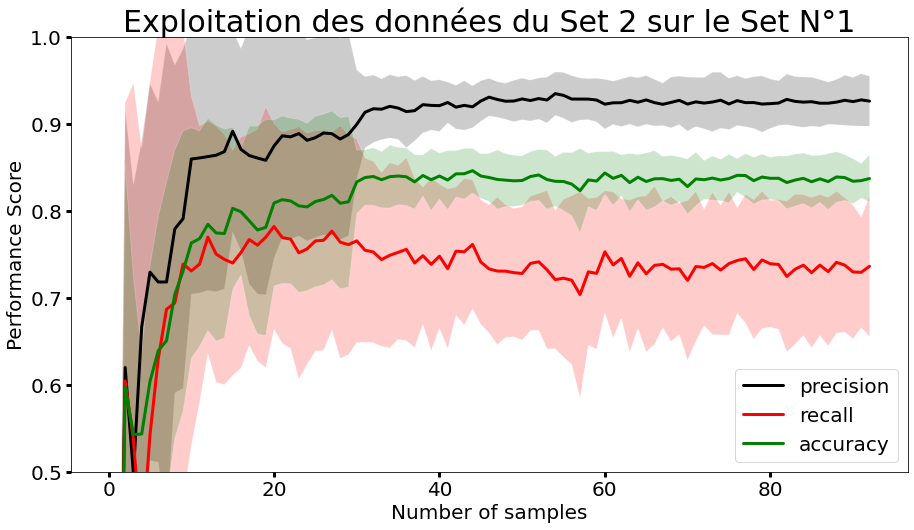

<Figure size 1080x576 with 0 Axes>

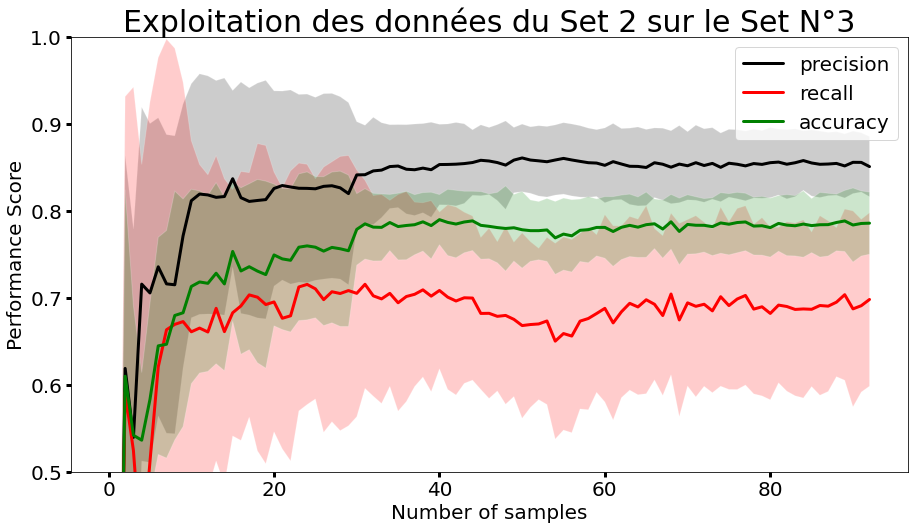

In [4]:

FPFHL_folder_set1 = "env1_table3"
FPFHL_folder_set3 = "env3_table3"
nb_scenes = 14

title = "Exploitation des données du Set 2 sur le Set N°1"
model = RandomForestClassifier()
mydisplay.displayNormalizedResults2(model,FPFHL_folder_set1,nb_scenes,title,batch_y_train_acc_exp,batch_y_train_acc_true,batch_X_train_acc_rough)



title = "Exploitation des données du Set 2 sur le Set N°3"
model = RandomForestClassifier()
mydisplay.displayNormalizedResults2(model,FPFHL_folder_set3,nb_scenes,title,batch_y_train_acc_exp,batch_y_train_acc_true,batch_X_train_acc_rough)


# Display de chacun des résultats de chacun des environnements
On entraine des classifieurs qu'on teste ensuite sur leur propre environnement puis on observe les résultats obtenus

In [3]:
total_batch = 21
#saving_file = "CieLAB_Experiment"
saving_file = "env1_table1"

batch_y_train_acc_exp = []
batch_y_train_acc_true = []
batch_X_train_acc_rough = []

for i in range(total_batch):    
    path_y_train_acc_exp = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"y_train_acc_exp"
    batch_y_train_acc_exp.append(myfct.readPickler(path_y_train_acc_exp))
    path_y_train_acc_true = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"y_train_acc_true"
    batch_y_train_acc_true.append(myfct.readPickler(path_y_train_acc_true))
    path_X_train_acc_rough = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"X_train_acc_rough"
    batch_X_train_acc_rough.append(myfct.readPickler(path_X_train_acc_rough))

<Figure size 1080x576 with 0 Axes>

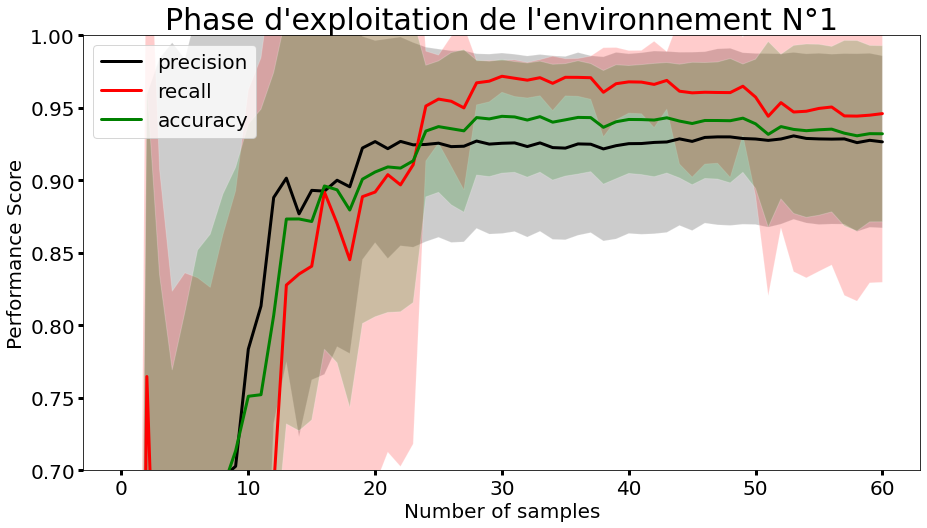

In [4]:
FPFHL_folder = "env1_table1"
nb_scenes = 14
title = "Phase d'exploitation de l'environnement N°1"

model = RandomForestClassifier()

mydisplay.displayNormalizedResults2(model,FPFHL_folder,nb_scenes,title,
                                    batch_y_train_acc_exp,batch_y_train_acc_true,batch_X_train_acc_rough)


In [4]:
total_batch = 21
#saving_file = "CieLAB_Experiment"
saving_file = "env2_table2"

batch_y_train_acc_exp = []
batch_y_train_acc_true = []
batch_X_train_acc_rough = []

for i in range(total_batch):    
    path_y_train_acc_exp = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"y_train_acc_exp"
    batch_y_train_acc_exp.append(myfct.readPickler(path_y_train_acc_exp))
    path_y_train_acc_true = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"y_train_acc_true"
    batch_y_train_acc_true.append(myfct.readPickler(path_y_train_acc_true))
    path_X_train_acc_rough = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"X_train_acc_rough"
    batch_X_train_acc_rough.append(myfct.readPickler(path_X_train_acc_rough))

<Figure size 1080x576 with 0 Axes>

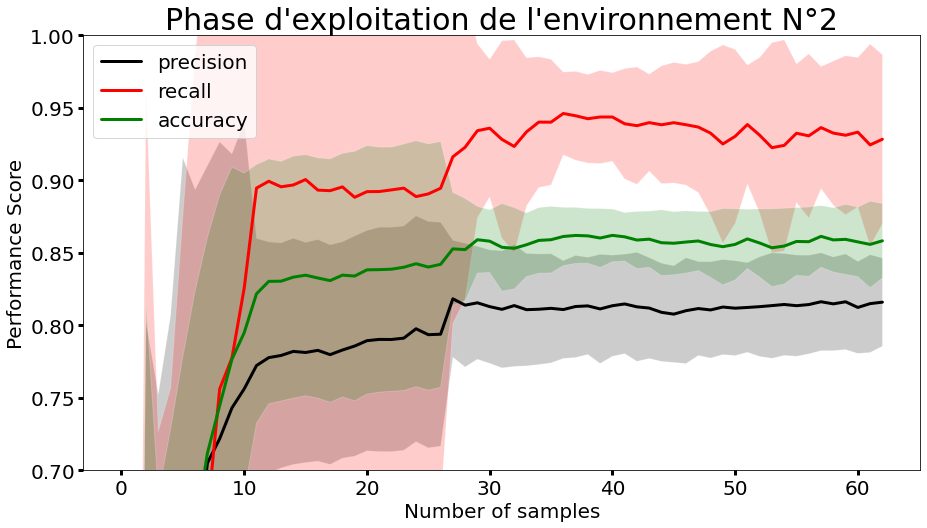

In [9]:
FPFHL_folder = "env2_table2"
nb_scenes = 14
title = "Phase d'exploitation de l'environnement N°2"

model = RandomForestClassifier()

mydisplay.displayNormalizedResults2(model,FPFHL_folder,nb_scenes,title,
                                    batch_y_train_acc_exp,batch_y_train_acc_true,batch_X_train_acc_rough)

In [6]:
total_batch = 18
#saving_file = "CieLAB_Experiment"
saving_file = "env3_table3"

batch_y_train_acc_exp = []
batch_y_train_acc_true = []
batch_X_train_acc_rough = []

for i in range(total_batch):    
    path_y_train_acc_exp = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"y_train_acc_exp"
    batch_y_train_acc_exp.append(myfct.readPickler(path_y_train_acc_exp))
    path_y_train_acc_true = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"y_train_acc_true"
    batch_y_train_acc_true.append(myfct.readPickler(path_y_train_acc_true))
    path_X_train_acc_rough = "../Plan_exp/" + saving_file + "/batch_num_"+str(i)+"X_train_acc_rough"
    batch_X_train_acc_rough.append(myfct.readPickler(path_X_train_acc_rough))

<Figure size 1080x576 with 0 Axes>

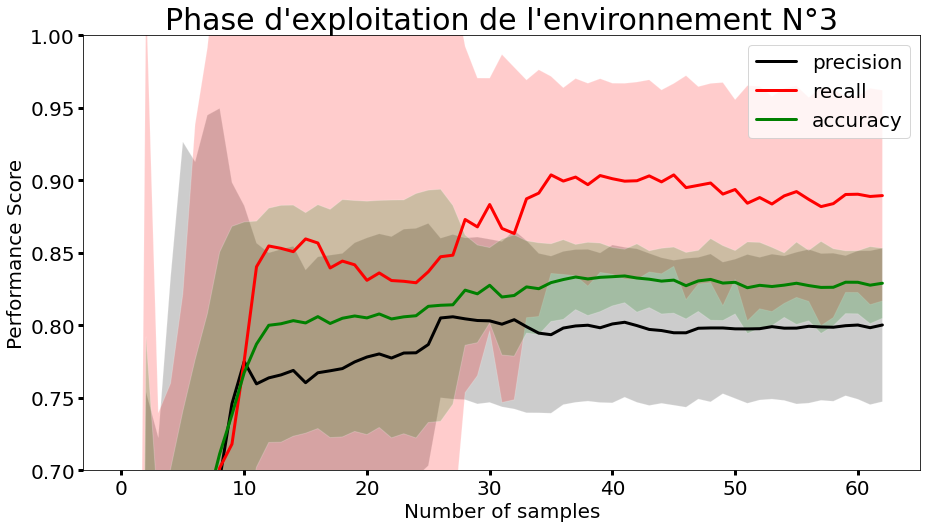

In [7]:
FPFHL_folder = "env3_table3"
nb_scenes = 14
title = "Phase d'exploitation de l'environnement N°3"

model = RandomForestClassifier()

mydisplay.displayNormalizedResults2(model,FPFHL_folder,nb_scenes,title,
                                    batch_y_train_acc_exp,batch_y_train_acc_true,batch_X_train_acc_rough)

# Affichage d'une scène selon plusieurs configuration

In [8]:
nomDossier = "env3_table3"
numIter = "2"
numeroDeScene = "1"
paths_to_output = "../outputs/"

In [15]:
from sklearn.preprocessing import StandardScaler 
model = RandomForestClassifier()
#On entraine un modèle grace aux données recuperé lors du batch "numBatch"
numBatch = 0
batch_y_train_acc_true[numBatch][0] = 1
model.fit(myfct.normalize(batch_X_train_acc_rough[numBatch][:]),batch_y_train_acc_exp[numBatch][:])
#model.fit(myfct.normalize(new_X),new_y)

sceneTest=pd.read_csv("../outputs/"+nomDossier+"/fpfh/fpfh_scene"+str(numeroDeScene)+"iter"+str(numIter)+".txt")
sceneTest.head()



#NORMALISER LES DONN2ES TESTS!!!!
scaler=StandardScaler() 
scaler.fit(sceneTest.drop('label',axis=1))
scaled_features = scaler.transform(sceneTest.drop('label',axis=1))
sceneTest_feat = pd.DataFrame(scaled_features,columns=sceneTest.columns[:-1])
sceneTest_feat.head()


from sklearn.metrics import classification_report,confusion_matrix

testPrediction = model.predict(myfct.normalize(scaled_features)) #Ici on choisit le model que l'on veut tester
testProba = model.predict_proba(myfct.normalize(scaled_features))
#print(confusion_matrix(y_test,pred))
testReality = np.array(sceneTest["label"])
testReality = np.concatenate(([0],testReality))

In [21]:
sceneTest_feat.head(10)

h1        h2        h3        h4        h5        h6        h7  \
0 -0.445853 -0.450843 -0.693122 -0.538694 -0.571722  1.087461 -0.581108   
1 -0.445853 -0.450843 -0.693122 -0.538694 -0.571722  1.087461 -0.581108   
2 -0.445853 -0.450843 -0.693122 -0.538694 -0.571722  1.087461 -0.581108   
3 -0.445853 -0.450843 -0.635553 -0.538694 -0.571722  1.074079 -0.581108   
4 -0.445853 -0.450843 -0.365158 -0.538694 -0.571722  1.011132 -0.581108   
5 -0.445853 -0.450843  2.504919  1.430728 -0.571722  0.040164 -0.581108   
6 -0.445853 -0.450843  0.234143  0.837036 -0.571722  0.659949 -0.581108   
7 -0.445853 -0.450843  0.937128  1.969681 -0.571722  0.322034 -0.581108   
8 -0.445853 -0.450843 -0.549736 -0.538694 -0.571722  1.054101 -0.581108   
9 -0.445853 -0.450843 -0.693122 -0.538694 -0.571722  1.087461 -0.581108   

         h8        h9       h10  ...  h39       h40       h41       h42  \
0 -0.492615 -0.749085 -0.545643  ...  0.0 -0.065248  0.139663 -0.125712   
1 -0.492615 -0.749085 -0.545643  ...  0.0 -0.065248  0.139663 -0.125712   
2 -0.492615 -0.749085 -0.545643  ...  0.0 -0.065248  0.139663 -0.125712   
3 -0.492615 -0.749085 -0.545643  ...  0.0 -0.065248  0.139663 -0.125712   
4 -0.492615 -0.749085 -0.545643  ...  0.0 -0.065248  0.139663 -0.125712   
5 -0.492615 -0.749085 -0.545643  ...  0.0 -0.065248  0.139663 -0.125712   
6 -0.492615 -0.749085 -0.545643  ...  0.0 -0.065248  0.139663 -0.125712   
7 -0.492615 -0.749085 -0.545643  ...  0.0 -0.065248  0.139663 -0.125712   
8 -0.492615 -0.749085 -0.545643  ...  0.0 -0.065248  0.139663 -0.125712   
9 -0.492615 -0.749085 -0.545643  ...  0.0 -0.065248  0.139663 -0.125712   

        h43  h44       h45       h46       h47  h48  
0 -0.081752  0.0 -0.039084  0.505875 -0.504856  0.0  
1 -0.081752  0.0 -0.039084  0.505875 -0.504856  0.0  
2 -0.081752  0.0 -0.039084  0.505875 -0.504856  0.0  
3 -0.081752  0.0 -0.039084  0.505875 -0.504856  0.0  
4 -0.081752  0.0 -0.039084  0.505875 -0.504856  0.0  
5 -0.081752  0.0 -0.039084  0.505875 -0.504856  0.0  
6 -0.081752  0.0 -0.039084  0.505875 -0.504856  0.0  
7 -0.081752  0.0 -0.039084  0.505875 -0.504856  0.0  
8 -0.081752  0.0 -0.039084  0.505875 -0.504856  0.0  
9 -0.081752  0.0 -0.039084  0.505875 -0.504856  0.0  

[10 rows x 48 columns]

### Affichage de la scène selectionnée

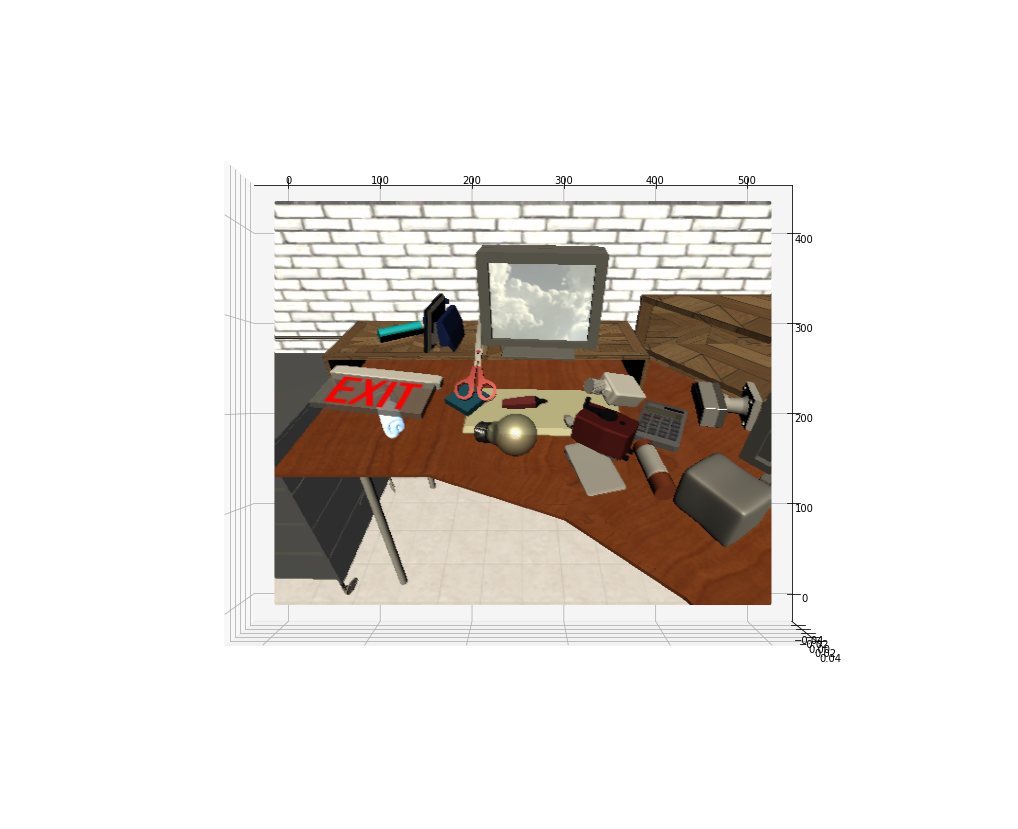

In [11]:
#segmented = mydisplay.read_xyzrgbls(paths_to_output+str(nomDossier)+"/vccs/vccs_scene"+str(numeroDeScene)+"iter"+numIter+".xyzrgbls")
segmented = mydisplay.read_xyzrgbls(paths_to_output+str(nomDossier)+"/nuageDisplay/nuage_scene"+str(numeroDeScene)+"iter"+numIter+".xyzrgbls")
svp_centroides = mydisplay.read_xyzrgbls(paths_to_output+str(nomDossier)+"/centroides/centroides_scene"+str(numeroDeScene)+"iter"+numIter+".xyzrgbls")
sceneTest=pd.read_csv("../outputs/"+nomDossier+"/fpfh/fpfh_scene"+str(numeroDeScene)+"iter"+str(numIter)+".txt")
X1,Y1,Z1,X2,Y2,Z2 = [],[],[],[],[],[]
for i in range(len(segmented)):
    X1.append(segmented[i][0])
    Y1.append(segmented[i][1])
    Z1.append(0)#segmented[i][2])
    
for i in range(len(svp_centroides)):
    if(sceneTest["label"][i] == 1):
        X2.append(svp_centroides[i][0])
        Y2.append(svp_centroides[i][1])
        Z2.append(0)#svp_centroides[i][2]+1000)
    
svp_obj = []
for i in range(len(testPrediction)):
    if(testPrediction[i]):
        svp_obj.append(i+1) 
        
colors = []
for i in range (len(segmented)):
    colors.append((segmented[i][3]/255, segmented[i][4]/255, segmented[i][5]/255))
    #for j in range(len(svp_obj)):
        #if(segmented[i][7] == svp_obj[j]):
        #    colors[-1] = (1.0, 1.0, 0.0)


colors = np.array(colors)

categories = []
for i in range(len(segmented)):
    categories.append(i)
    
fig = plt.figure(figsize = (18,15))
ax = fig.gca(projection='3d')
ax.view_init(90, 270)
ax.scatter(X1, Y1, Z1, c=colors[categories], marker='.')
#ax.scatter(X2, Y2, Z2, c='yellow',linewidths = 4, marker='.')


### Affichage des centroides des SuperVoxels Persistant appartenant à un objet

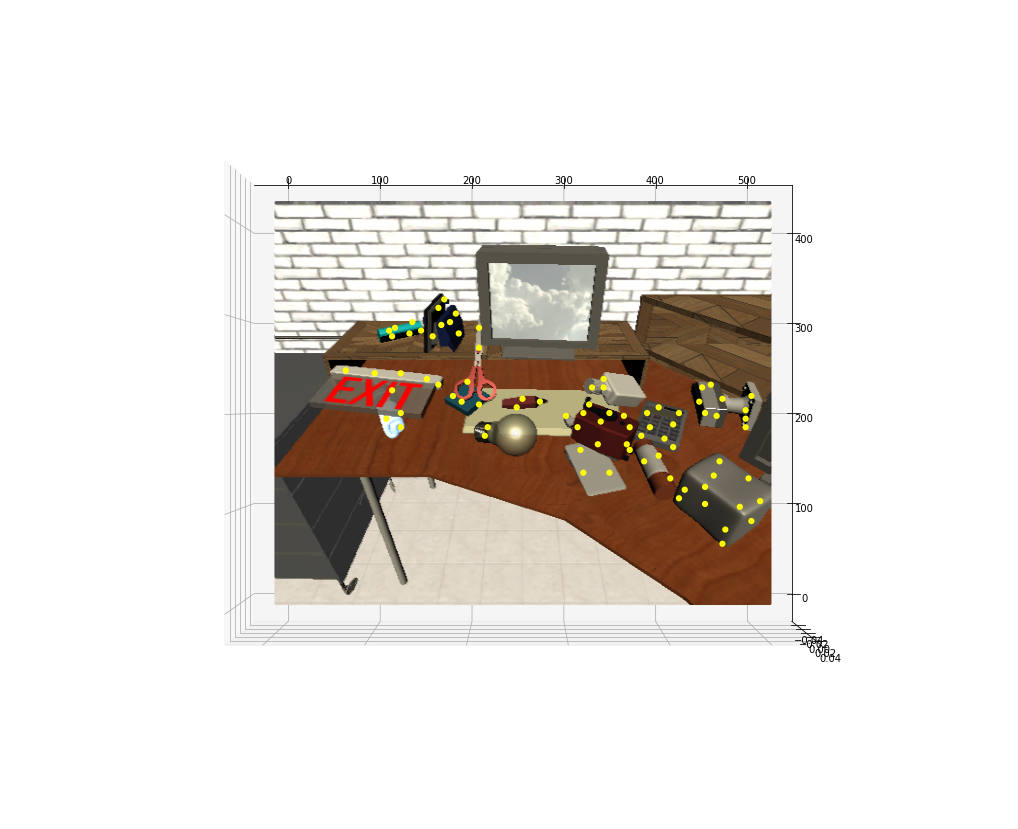

In [10]:


#segmented = mydisplay.read_xyzrgbls(paths_to_output+str(nomDossier)+"/vccs/vccs_scene"+str(numeroDeScene)+"iter"+numIter+".xyzrgbls")
segmented = mydisplay.read_xyzrgbls(paths_to_output+str(nomDossier)+"/nuageDisplay/nuage_scene"+str(numeroDeScene)+"iter"+numIter+".xyzrgbls")
svp_centroides = mydisplay.read_xyzrgbls(paths_to_output+str(nomDossier)+"/centroides/centroides_scene"+str(numeroDeScene)+"iter"+numIter+".xyzrgbls")
sceneTest=pd.read_csv("../outputs/"+nomDossier+"/fpfh/fpfh_scene"+str(numeroDeScene)+"iter"+str(numIter)+".txt")
X1,Y1,Z1,X2,Y2,Z2 = [],[],[],[],[],[]
for i in range(len(segmented)):
    X1.append(segmented[i][0])
    Y1.append(segmented[i][1])
    Z1.append(0)#segmented[i][2])
    
for i in range(len(svp_centroides)):
    if(sceneTest["label"][i] == 1):
        X2.append(svp_centroides[i][0])
        Y2.append(svp_centroides[i][1])
        Z2.append(0)#svp_centroides[i][2]+1000)
    
svp_obj = []
for i in range(len(testPrediction)):
    if(testPrediction[i]):
        svp_obj.append(i+1) 
        
colors = []
for i in range (len(segmented)):
    colors.append((segmented[i][3]/255, segmented[i][4]/255, segmented[i][5]/255))
    #for j in range(len(svp_obj)):
        #if(segmented[i][7] == svp_obj[j]):
        #    colors[-1] = (1.0, 1.0, 0.0)


colors = np.array(colors)

categories = []
for i in range(len(segmented)):
    categories.append(i)
    
fig = plt.figure(figsize = (18,15))
ax = fig.gca(projection='3d')
ax.view_init(90, 270)
ax.scatter(X1, Y1, Z1, c=colors[categories], marker='.')
ax.scatter(X2, Y2, Z2, c='yellow',linewidths = 4, marker='.')

### Affichage des prévisions du classifieur
Les points jaunes représentent les Centroïdes des SVP percu comme appartenant à un objet selon notre classifieur

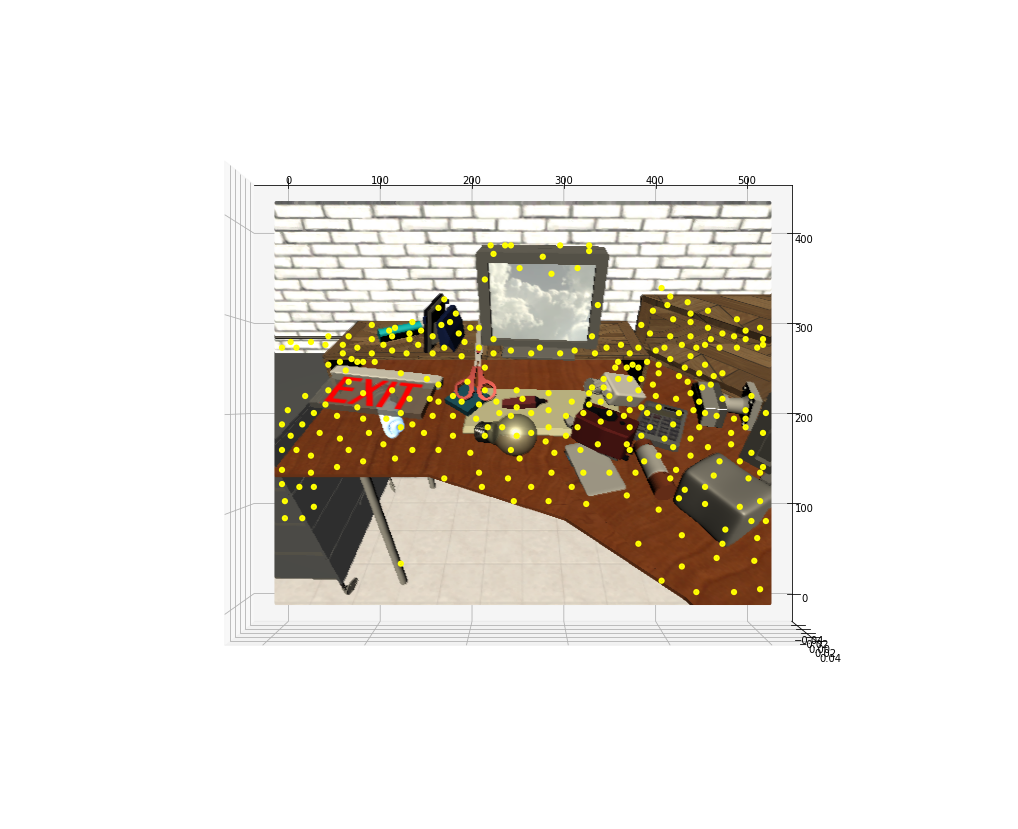

In [52]:
#segmented = mydisplay.read_xyzrgbls(paths_to_output+str(nomDossier)+"/vccs/vccs_scene"+str(numeroDeScene)+"iter"+numIter+".xyzrgbls")
segmented = mydisplay.read_xyzrgbls(paths_to_output+str(nomDossier)+"/nuageDisplay/nuage_scene"+str(numeroDeScene)+"iter"+numIter+".xyzrgbls")
svp_centroides = mydisplay.read_xyzrgbls(paths_to_output+str(nomDossier)+"/centroides/centroides_scene"+str(numeroDeScene)+"iter"+numIter+".xyzrgbls")
X1,Y1,Z1,X2,Y2,Z2 = [],[],[],[],[],[]

for i in range(len(segmented)):
    X1.append(segmented[i][0])
    Y1.append(segmented[i][1])
    Z1.append(0)#segmented[i][2])
    
for i in range(len(testPrediction)):
    if(testPrediction[i]):
        X2.append(svp_centroides[i][0])
        Y2.append(svp_centroides[i][1])
        Z2.append(0)#svp_centroides[i][2]+1000)
    

        
colors = []
for i in range (len(segmented)):
    colors.append((segmented[i][3]/255, segmented[i][4]/255, segmented[i][5]/255))
    #for j in range(len(svp_obj)):
        #if(segmented[i][7] == svp_obj[j]):
        #    colors[-1] = (1.0, 1.0, 0.0)


colors = np.array(colors)

categories = []
for i in range(len(segmented)):
    categories.append(i)
    
fig = plt.figure(figsize = (18,15))
ax = fig.gca(projection='3d')
ax.view_init(90, 270)
ax.scatter(X1, Y1, Z1, c=colors[categories], marker='.')
ax.scatter(X2, Y2, Z2, c='yellow',linewidths = 4, marker='.')

### Affichage des prévisions du classifieur avec seuil
Les points bleus représentent les Centroïdes des SVP percu comme appartenant à un objet selon notre classifieur avec une prédiction suppérieur au seuil(threshold) selectionné et appartenant réellement à un objet
Les points rouges représentent les Centroïdes des SVP percu comme appartenant à un objet selon notre classifieur avec une prédiction suppérieur au seuil(threshold) selectionné mais n'appartement pas réellement à un objet
On peut alors remarquer des erreurs sur la véritable labélisation des objet ce qui est du à une mauvaise définition des Mesh Collider de certains objets sous Unity dans le set d'objet Numéro 3



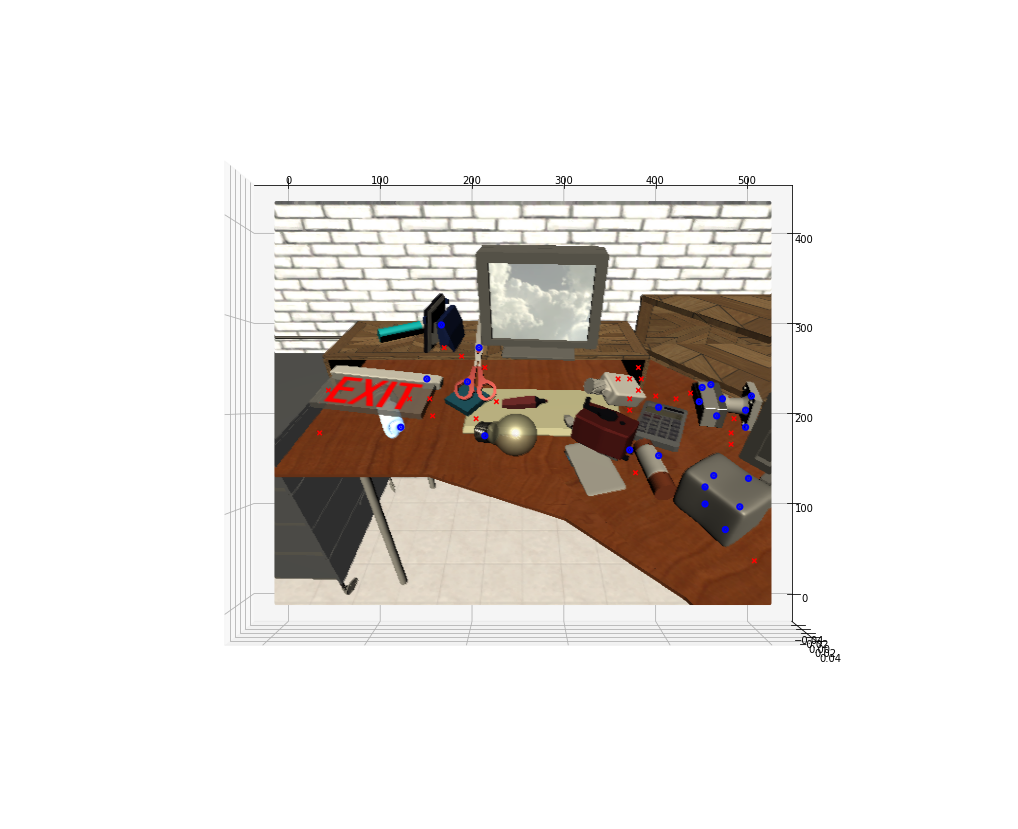

In [63]:
#segmented = mydisplay.read_xyzrgbls(paths_to_output+str(nomDossier)+"/vccs/vccs_scene"+str(numeroDeScene)+"iter"+numIter+".xyzrgbls")
segmented = mydisplay.read_xyzrgbls(paths_to_output+str(nomDossier)+"/nuageDisplay/nuage_scene"+str(numeroDeScene)+"iter"+numIter+".xyzrgbls")
svp_centroides = mydisplay.read_xyzrgbls(paths_to_output+str(nomDossier)+"/centroides/centroides_scene"+str(numeroDeScene)+"iter"+numIter+".xyzrgbls")
sceneTest=pd.read_csv("../outputs/"+nomDossier+"/fpfh/fpfh_scene"+str(numeroDeScene)+"iter"+str(numIter)+".txt")
X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3 = [],[],[],[],[],[],[],[],[]

for i in range(len(segmented)):
    X1.append(segmented[i][0])
    Y1.append(segmented[i][1])
    Z1.append(0)#segmented[i][2])
    
for i in range(len(testProba)):
    if(testProba[i][1]>0.99 and sceneTest["label"][i] == 1):
        X2.append(svp_centroides[i][0])
        Y2.append(svp_centroides[i][1])
        Z2.append(0)#svp_centroides[i][2]+1000)

for i in range(len(testProba)):
    if(testProba[i][1]>0.99 and sceneTest["label"][i] == 0):
        X3.append(svp_centroides[i][0])
        Y3.append(svp_centroides[i][1])
        Z3.append(0)#svp_centroides[i][2]+1000)
        
    

        
colors = []
for i in range (len(segmented)):
    colors.append((segmented[i][3]/255, segmented[i][4]/255, segmented[i][5]/255))
    #for j in range(len(svp_obj)):
        #if(segmented[i][7] == svp_obj[j]):
        #    colors[-1] = (1.0, 1.0, 0.0)


colors = np.array(colors)

categories = []
for i in range(len(segmented)):
    categories.append(i)
    
fig = plt.figure(figsize = (18,15))
ax = fig.gca(projection='3d')
ax.view_init(90, 270)
ax.scatter(X1, Y1, Z1, c=colors[categories], marker='.')
ax.scatter(X2, Y2, Z2, c='blue',linewidths = 5, marker='.')
ax.scatter(X3, Y3, Z3, c='red',linewidths = 4, marker='x')

### Affichage du nuage de point selectionné dans le referentiel monde

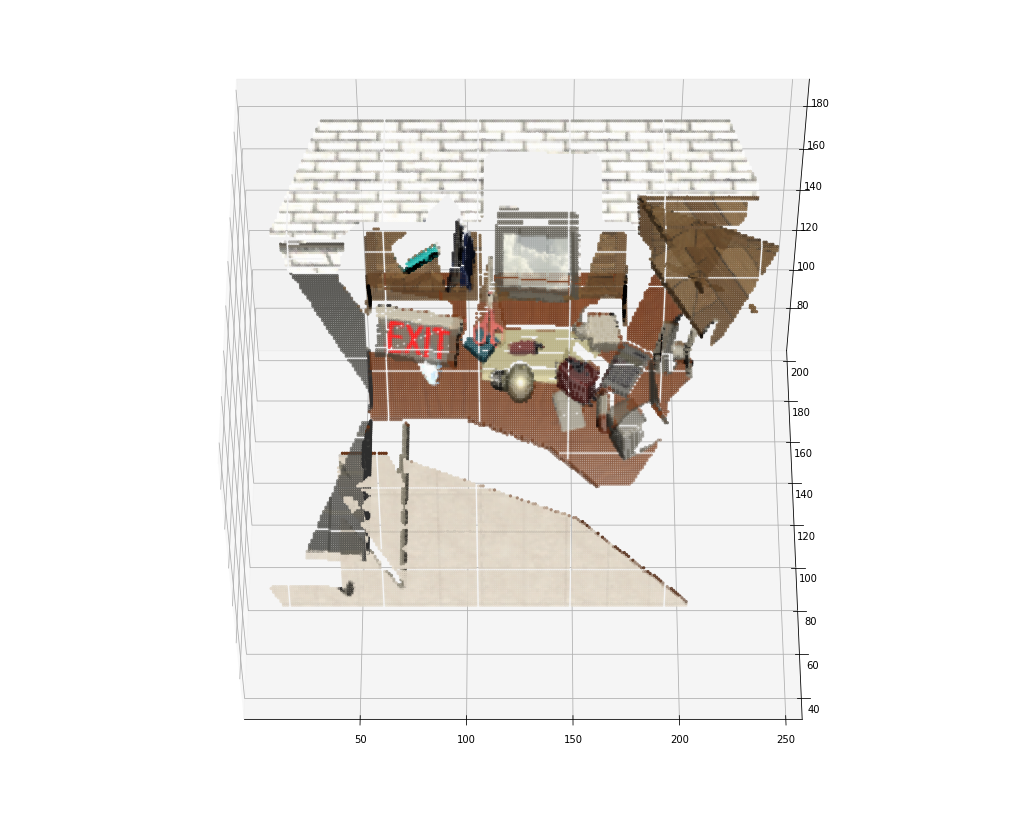

In [54]:


segmented = mydisplay.read_xyzrgbls(paths_to_output+str(nomDossier)+"/vccs/vccs_scene"+str(numeroDeScene)+"iter"+numIter+".xyzrgbls")

X,Y,Z = [],[],[]
for i in range(len(segmented)):
    X.append(segmented[i][0])
    Y.append(segmented[i][1])
    Z.append(segmented[i][2])
    
svp_obj = []
for i in range(len(testPrediction)):
    if(testPrediction[i]):
        svp_obj.append(i+1) 
        
colors = []
for i in range (len(segmented)):
    colors.append((segmented[i][3]/255, segmented[i][4]/255, segmented[i][5]/255))
    #for j in range(len(svp_obj)):
        #if(segmented[i][7] == svp_obj[j]):
        #    colors[-1] = (1.0, 1.0, 0.0)


colors = np.array(colors)

categories = []
for i in range(len(segmented)):
    categories.append(i)
    
fig = plt.figure(figsize = (18,15))
ax = fig.gca(projection='3d')
ax.view_init(90-35, 270)
ax.scatter(X, Y, Z, c=colors[categories], marker='.')
#ax.scatter(400, 400, 1000, c='yellow',linewidths = 5, marker='o')

### Affichage des prévisions du classifieur dans le referentiel monde
Les SVP percu comme appartenant à un objet selon notre classifieur sont coloriés en Jaune
Utilisation d'un seuil(threshold)

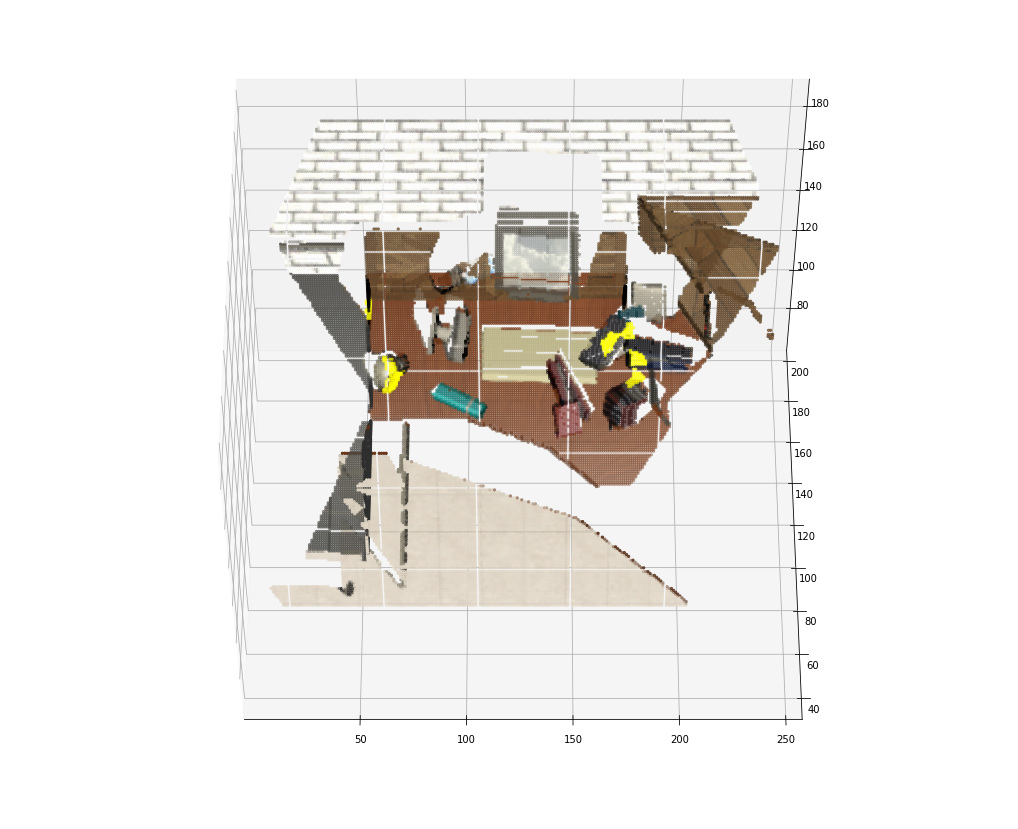

In [55]:
segmented = mydisplay.read_xyzrgbls(paths_to_output+str(nomDossier)+"/vccs/vccs_scene"+str(numeroDeScene)+"iter"+numIter+".xyzrgbls")

X,Y,Z = [],[],[]
for i in range(len(segmented)):
    X.append(segmented[i][0])
    Y.append(segmented[i][1])
    Z.append(segmented[i][2])
    
svp_obj = []
for i in range(len(testProba)):
    if(testProba[i][1]>0.98):
        svp_obj.append(i+1) 
        
colors = []
for i in range (len(segmented)):
    colors.append((segmented[i][3]/255, segmented[i][4]/255, segmented[i][5]/255))
    for j in range(len(svp_obj)):
        if(segmented[i][7] == svp_obj[j]):
            colors[-1] = (1.0, 1.0, 0.0)


colors = np.array(colors)

categories = []
for i in range(len(segmented)):
    categories.append(i)
    
fig = plt.figure(figsize = (18,15))
ax = fig.gca(projection='3d',proj_type = 'persp')

ax.view_init(90-35, -90)
#ax.zaxis_inverted
ax.scatter(X, Y, Z, c=colors[categories], marker='.')

### Affichage des Supervoxels persistants dans le referentiel Monde
Ici chaque supervoxel est associé à une couleur particulière

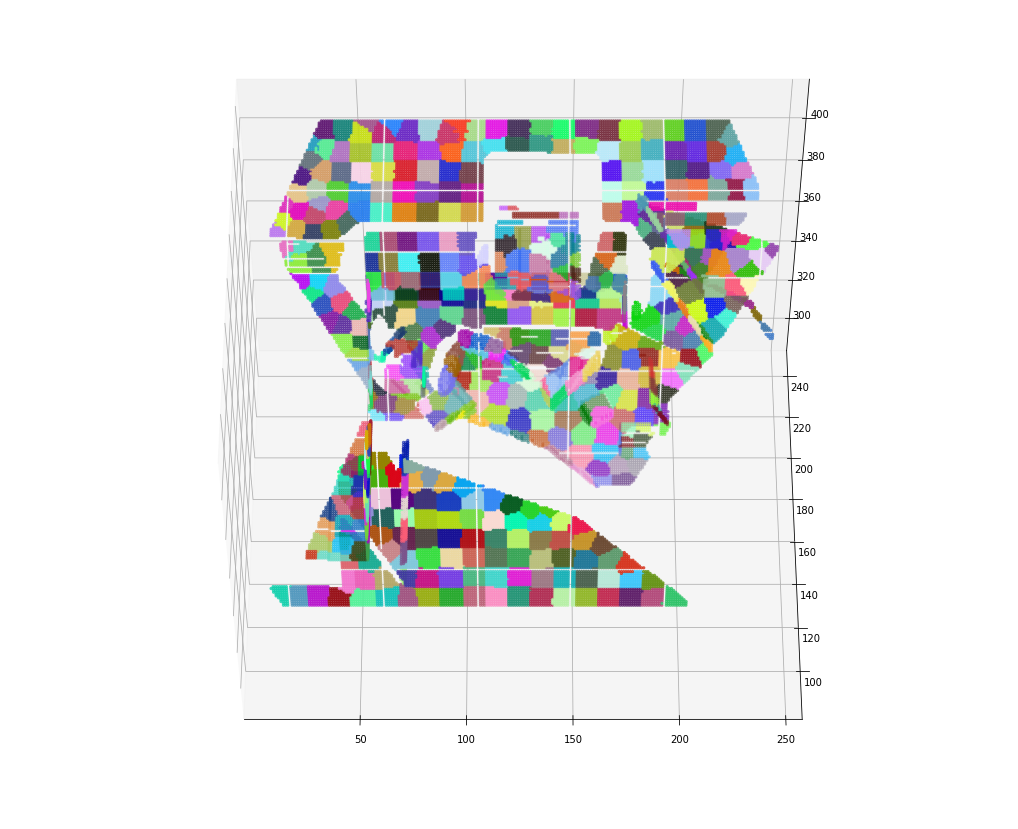

In [59]:


segmented = mydisplay.read_xyzrgbls(paths_to_output+str(nomDossier)+"/vccs/vccs_scene"+str(numeroDeScene)+"iter"+numIter+".xyzrgbls")

X,Y,Z = [],[],[]
for i in range(len(segmented)):
    X.append(segmented[i][0])
    Y.append(segmented[i][1]+((-2.82/4.5)+1)*128)
    Z.append(segmented[i][2]+((+3.42/4.5)+1)*128)
    
colors = []
for i in range (3000):
    colors.append((random.uniform(0,1), random.uniform(0,1), random.uniform(0,1), 1.0))
colors = np.array(colors)

categories = []
for i in range(len(segmented)):
    categories.append(int(segmented[i][-1]))
    
fig = plt.figure(figsize = (18,15))
ax = fig.gca(projection='3d')
ax.view_init(90-35, -90)
ax.scatter(X, Y, Z, c=colors[categories], marker='.')